In [1]:
import tensorflow as tf
import numpy as np
import random as rnd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

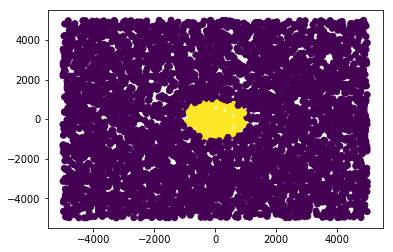

In [3]:
radius_of_circle = 1000
x_center = 5
y_center = 5
n = 5000
X = np.asarray([rnd.randint(-n,n) for i in range(n*2)]).reshape(n,2)
Y = np.array([[(1 if ((X[i][0]-x_center)**2)+((X[i][1]-y_center)**2)<=(radius_of_circle**2) else 0)] for i in range(len(X))])
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [15]:
number_hidden_nodes = 3
lambd = 0.00001
radius_of_circle = 1000
b11 = []
b12 = []
errors = []
bHidden = []
train_steps = []
x_center = 5
y_center = 5
n = 5000
X = np.asarray([rnd.randint(-n,n) for i in range(n*2)]).reshape(n,2)
Y = np.array([[(1 if ((X[i][0]-x_center)**2)+((X[i][1]-y_center)**2)<=(radius_of_circle**2) else 0)] for i in range(len(X))])
input_size_layer1=2
output_size_layer1 = 1
#Los placeholders son para los datos de entrada
x = tf.placeholder(tf.float32, [None, input_size_layer1])
y_ = tf.placeholder(tf.float32, [None, output_size_layer1]) #la y real
    
#La variables para lo que se va a ir calculando y modificando en el camino
W=tf.Variable(tf.random_uniform([input_size_layer1,number_hidden_nodes], -1, 1), name="W_layer1")
b = tf.Variable(tf.random_uniform([number_hidden_nodes]), name = "b_layer1")
    
hidden_layer= tf.nn.sigmoid(tf.matmul(x,W)+b) 
    
W2=tf.Variable(tf.random_uniform([number_hidden_nodes,output_size_layer1], -1, 1), name="W_layer2")
b2 = tf.Variable(tf.random_uniform([output_size_layer1]), name = "b_layer2")
    
out_put_layer = tf.nn.sigmoid(tf.matmul(hidden_layer,W2)+b2) 
    
lossfn = tf.reduce_mean(tf.reduce_sum((y_-out_put_layer)**2))
train_step = tf.train.GradientDescentOptimizer(lambd).minimize(lossfn)
    
init = tf.global_variables_initializer()
sess = tf.Session() # tipo de sesion, puede ser interactiva
sess.run(init)

for i in range(1000):
    train, error_value, w1_value, w2_value, b1_value, b2_value = sess.run([train_step, lossfn, W, W2, b, b2], feed_dict={x: X, y_: Y})
    b11.append(b1_value[0])
    b12.append(b1_value[1])
    bHidden.append(b2_value)
    errors.append(error_value)
    train_steps.append(train)
    
correct_prediction = tf.equal(tf.round(out_put_layer),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y_: Y})) # las corremos

sess.close()

0.9694


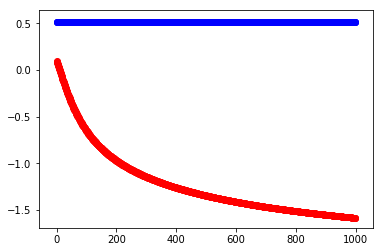

In [17]:
time = [i for i in range(1000)]
plt.scatter(time, b11, color='blue')
plt.scatter(time, bHidden, color='red')
plt.show()